In [1]:
import os

# Import Matplot lib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Pandas
import pandas as pd

# Import dotenv to read file and set environment variables
from dotenv import load_dotenv
env_path = "./postgres.env"
load_dotenv(dotenv_path=env_path)

# Retrieve credentials from environment variable
username=os.environ.get("postgres_user")
password=os.environ.get("postgres_pwd")

# Set DB URI
db_url = "postgresql://" + username + ":" + password + "@localhost:5432/employeesql"


In [2]:
# Read salaries into Dataframe
salaries_df = pd.read_sql_table('salaries', db_url)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


(array([1.51743e+05, 5.37790e+04, 4.10980e+04, 2.73130e+04, 1.55650e+04,
        7.20900e+03, 2.48700e+03, 6.69000e+02, 1.43000e+02, 1.80000e+01]),
 array([ 40000. ,  48949.2,  57898.4,  66847.6,  75796.8,  84746. ,
         93695.2, 102644.4, 111593.6, 120542.8, 129492. ]),
 <a list of 10 Patch objects>)

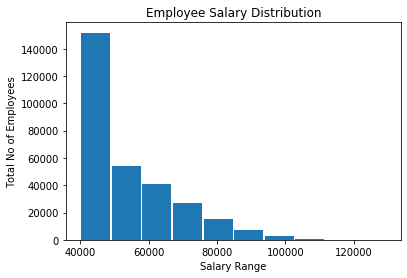

In [3]:
# Plot Histogram
plt.xlabel('Salary Range')
plt.ylabel('Total No of Employees')
plt.title('Employee Salary Distribution')
plt.hist(salaries_df.salary, rwidth=0.95, label='Salaries' )

In [4]:
# Read job titles into Dataframe
titles_df = pd.read_sql_table('titles', db_url)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [5]:
# Merge salaries and job titles dataframes

salaries_titles_df = pd.merge(salaries_df, titles_df, how='inner', on='emp_no')
combined_salaries_df = salaries_titles_df[['salary', 'title']]
combined_salaries_df.head()

,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
4,40054,Senior Engineer


In [6]:
# Grooup salaries by title and calculate average salary

grouped_salaries_df = combined_salaries_df.groupby(['title']).mean()
print(grouped_salaries_df)

                          salary
title                           
Assistant Engineer  48493.204786
Engineer            48539.781423
Manager             51531.041667
Senior Engineer     48506.751806
Senior Staff        58503.286614
Staff               58465.271904
Technique Leader    48580.505772


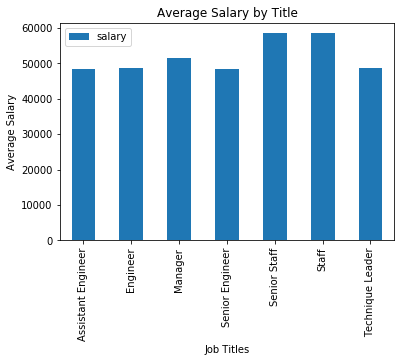

<Figure size 432x288 with 0 Axes>

In [7]:
# Create Bar Chart

# Create a bar chart based off of the groupby dataframe
salary_chart = grouped_salaries_df.plot(kind='bar')

# Set the xlabel, ylable and title
salary_chart.set_xlabel("Job Titles")
salary_chart.set_ylabel("Average Salary")
salary_chart.set_title("Average Salary by Title")

plt.show()
plt.tight_layout()